# MNIST example
Ch.2


In [63]:
%matplotlib inline

In [89]:
# load training and testing data from MNIST
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Training set Images:
  Shape: (60000, 28, 28)
  Data types: (dtype('uint8'), dtype('uint8'), dtype('uint8'))

Training set Labels:
  Number: 60000
  Data type: uint8

Fourth image in training set:


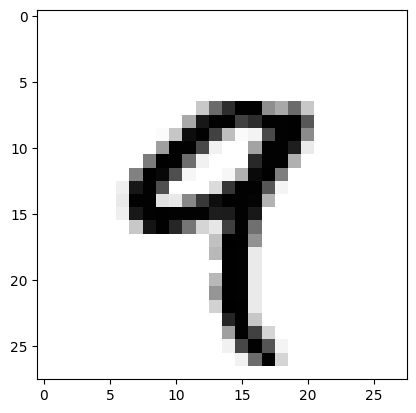

In [100]:
# explore data
import matplotlib.pyplot as plt
print('Training set Images:')
print(f'  Shape: {train_images.shape}')
print(f'  Data types: {(train_images[0].dtype, train_images[1].dtype, train_images[2].dtype)}\n')
print(f'Training set Labels:')
print(f'  Number: {len(train_labels)}')
print(f'  Data type: {train_labels[0].dtype}\n')
print(f'Fourth image in training set:')
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.show()

In [101]:
# define network architecture
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [102]:
# perform compilation step
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [122]:
# Prepare the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [123]:
# fit the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2909 - accuracy: 0.9158
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2740 - accuracy: 0.9210
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2591 - accuracy: 0.9244
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2458 - accuracy: 0.9284
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2336 - accuracy: 0.9318


In [124]:
# test the model by making predictions with the first ten images in the test data
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
# pick one of the images to check (value must be in the range 0 to 9)
check_image=0
# show the probability distribution of the digit predictions for this image
predictions[check_image]

1/1 [==============================] - 0s 15ms/step


array([4.7158348e-05, 1.5087720e-08, 2.0205145e-04, 1.5479388e-03,
       1.2734509e-07, 6.6780332e-05, 1.0749783e-09, 9.9789017e-01,
       5.8655519e-06, 2.3975951e-04], dtype=float32)

In [125]:
# Identify highest probability
import numpy as np
max_probability = np.amax(predictions[check_image])
print('The highest probability is %d' % max_probability)
print('This corresponds to the digit %d\n' % np.where(predictions[check_image] == max_probability))

The highest probability is 0
This corresponds to the digit 7



In [126]:
# evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy: {test_acc}\n')

313/313 [==============================] - 0s 1ms/step - loss: 0.2276 - accuracy: 0.9341
Accuracy: 0.9340999722480774



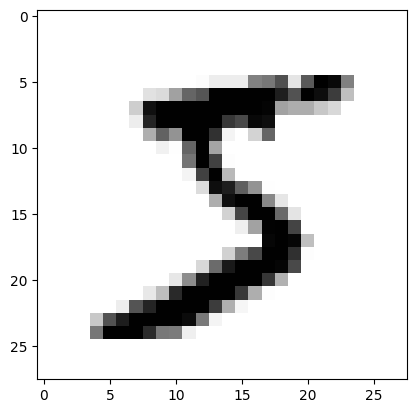

In [128]:
# display image
import matplotlib.pyplot as plt
digit = train_images[check_image].reshape(28,28)
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()